<a href="https://www.kaggle.com/code/rodolphojustino/analysis-of-immigration-to-from-1980-to-2013?scriptVersionId=119292551" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Author: Rodolpho Justino
## Data Analyst / Data Scientist


An exploratory data analysis of the db will be performed along with some insights to be taken.

This dataset is a compilation of international immigrant flows (in or out) from different countries to canada, and can be retrieved [here](https://www.kaggle.com/datasets/danishasif/canada-immigratation).

The data was gathered by the United Nations and has informations about 45 coutries.

The first step is to load some libraries that will be used on the analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline

In [2]:
df = pd.read_excel("/kaggle/input/canada-immigration-dataset/Canada.xlsx",
sheet_name = "Canada by Citizenship", skiprows = range (20), skipfooter = 2)

df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


Some information on the dataset probably won't be used, such as AREA, REG, DEV, so, we can drop these specific columns

In [3]:
df.drop(["AREA", "REG", "DEV"], axis = 1, inplace = True)
df.head()

,Type,Coverage,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


Some columns can also be renamed, such as OdName, AreaName, RegName

In [4]:
df.rename(columns = {"OdName":"Country", "AreaName":"Continent", "RegName":"Region"}, inplace = True)
df.head()

,Type,Coverage,Country,Continent,Region,DevName,1980,1981,1982,1983,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


Checking for nulls in the DF

In [5]:
df.isnull().sum()

Type         0
Coverage     0
Country      0
Continent    0
Region       0
DevName      0
1980         0
1981         0
1982         0
1983         0
1984         0
1985         0
1986         0
1987         0
1988         0
1989         0
1990         0
1991         0
1992         0
1993         0
1994         0
1995         0
1996         0
1997         0
1998         0
1999         0
2000         0
2001         0
2002         0
2003         0
2004         0
2005         0
2006         0
2007         0
2008         0
2009         0
2010         0
2011         0
2012         0
2013         0
dtype: int64

In [6]:
df.set_index("Country", inplace = True)

In [7]:
df["Total"] = df.sum(axis = 1)
df

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


,Type,Coverage,Continent,Region,DevName,1980,1981,1982,1983,1984,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Immigrants,Foreigners,Asia,Southern Asia,Developing regions,16,39,39,47,71,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Immigrants,Foreigners,Europe,Southern Europe,Developed regions,1,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Immigrants,Foreigners,Africa,Northern Africa,Developing regions,80,67,71,69,63,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Immigrants,Foreigners,Oceania,Polynesia,Developing regions,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Immigrants,Foreigners,Europe,Southern Europe,Developed regions,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,Immigrants,Foreigners,Asia,South-Eastern Asia,Developing regions,1191,1829,2162,3404,7583,...,1852,3153,2574,1784,2171,1942,1723,1731,2112,97146
Western Sahara,Immigrants,Foreigners,Africa,Northern Africa,Developing regions,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
Yemen,Immigrants,Foreigners,Asia,Western Asia,Developing regions,1,2,1,6,0,...,161,140,122,133,128,211,160,174,217,2985


In [8]:
df.loc["Brazil"]

Type                              Immigrants
Coverage                          Foreigners
Continent    Latin America and the Caribbean
Region                         South America
DevName                   Developing regions
1980                                     211
1981                                     220
1982                                     192
1983                                     139
1984                                     145
1985                                     130
1986                                     205
1987                                     244
1988                                     394
1989                                     650
1990                                     650
1991                                     877
1992                                    1066
1993                                     866
1994                                     566
1995                                     572
1996                                     586
1997      

In [9]:
df.columns = list(map(str, df.columns))
years = list(map(str, range(1980,2014)))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

In [10]:
Brazil = df.loc["Brazil", years]
Brazil.head()

1980    211
1981    220
1982    192
1983    139
1984    145
Name: Brazil, dtype: object

Text(0.5, 0, 'Year')

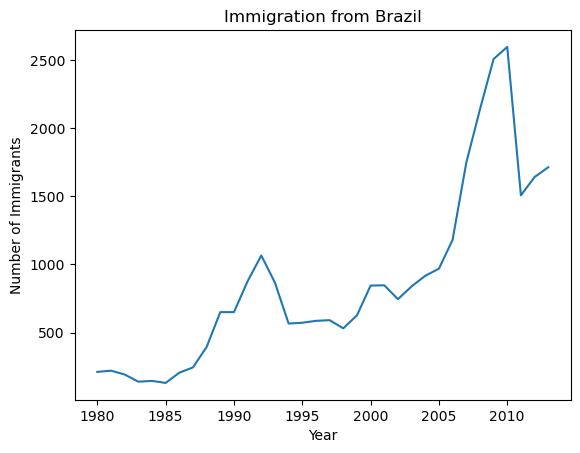

In [11]:
Brazil.plot()
plt.title ("Immigration from Brazil")
plt.ylabel("Number of Immigrants")
plt.xlabel("Year")

## Investigating the contribution of the top 5 countries along the years

In [12]:
df.sort_values(["Total"], ascending = False, axis = 0, inplace = True)
df_top5 = df.head()

df_top5

,Type,Coverage,Continent,Region,DevName,1980,1981,1982,1983,1984,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Immigrants,Foreigners,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Immigrants,Foreigners,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Immigrants,Foreigners,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Immigrants,Foreigners,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Immigrants,Foreigners,Asia,Southern Asia,Developing regions,978,972,1201,900,668,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


In [13]:
df_top5 = df_top5[years].transpose()
df_top5

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668
1985,4211,1816,9564,3150,514
1986,7150,1960,9470,4166,691
1987,10189,2643,21337,7360,1072
1988,11522,2758,27359,8639,1334
1989,10343,4323,23795,11865,2261


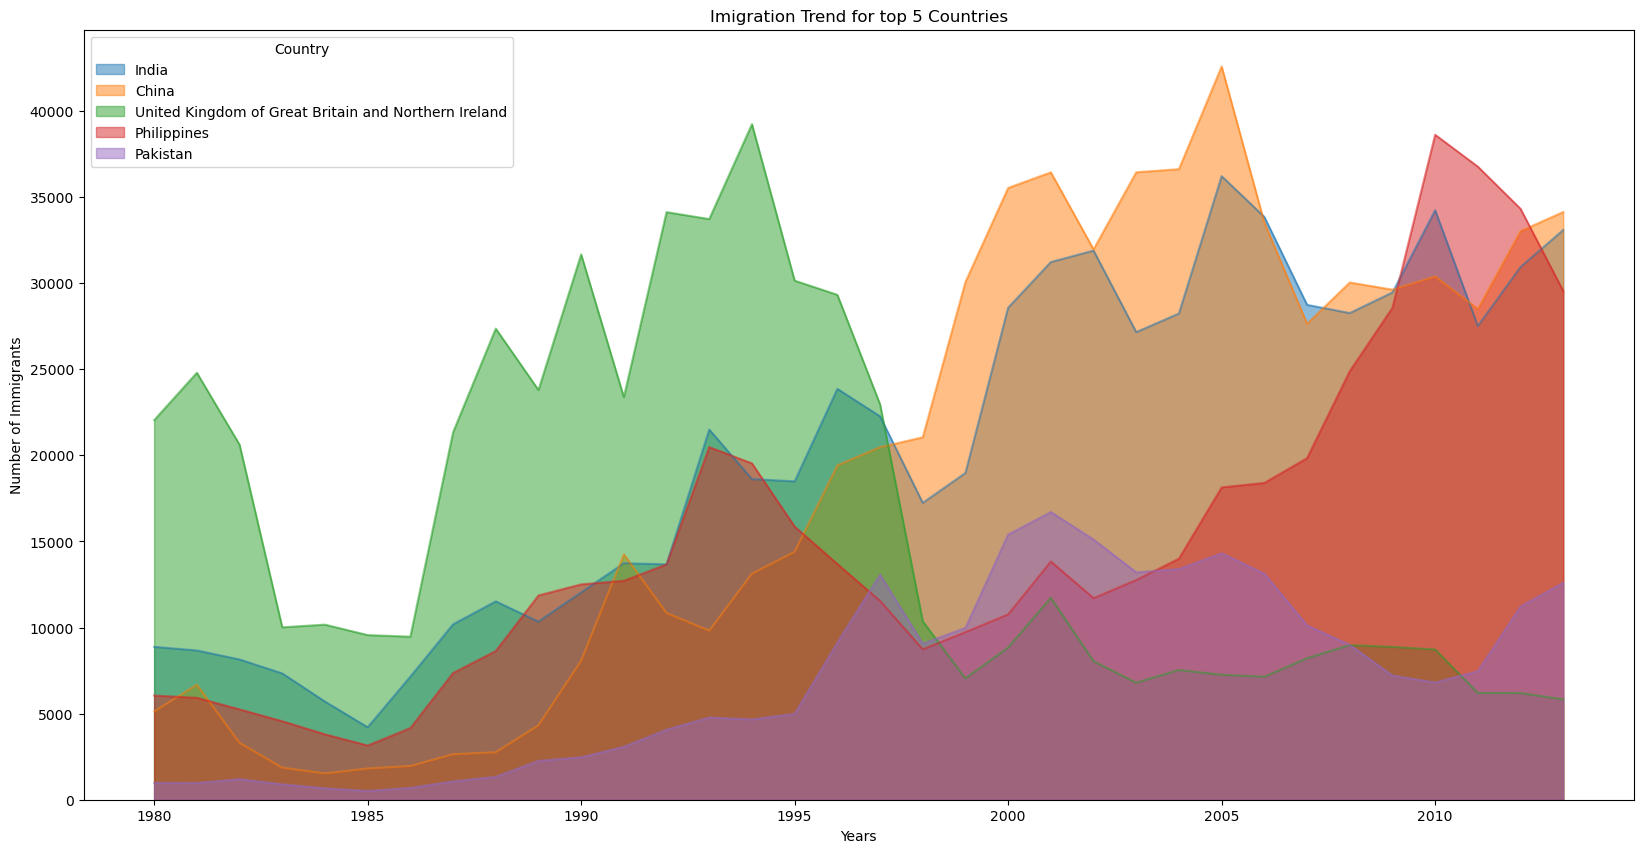

In [14]:
df_top5.index = df_top5.index.map(int)

ax = df_top5.plot(kind = "area", stacked = False, figsize = (20,10))

ax.set_title ("Imigration Trend for top 5 Countries")
ax.set_xlabel("Years")
ax.set_ylabel("Number of Immigrants")

plt.show()

## Using an histogram to check the contribution of contries through 2013

[Text(0, 0, '178'),
 Text(0, 0, '11'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '2')]

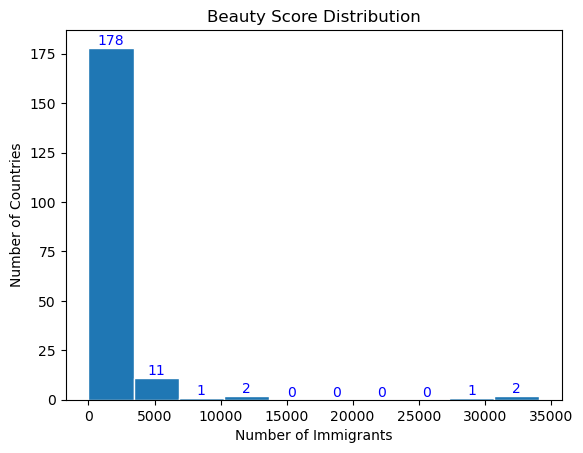

In [15]:
values, bins, bars = plt.hist(df["2013"], edgecolor = "White")
plt.xlabel("Number of Immigrants")
plt.ylabel("Number of Countries")
plt.title("Beauty Score Distribution")
plt.bar_label(bars, fontsize=10, color='blue')